Atlantic Coast - Mean: 21.95263157894737, Median: 13.0, Mode: [13.0, 20.0]


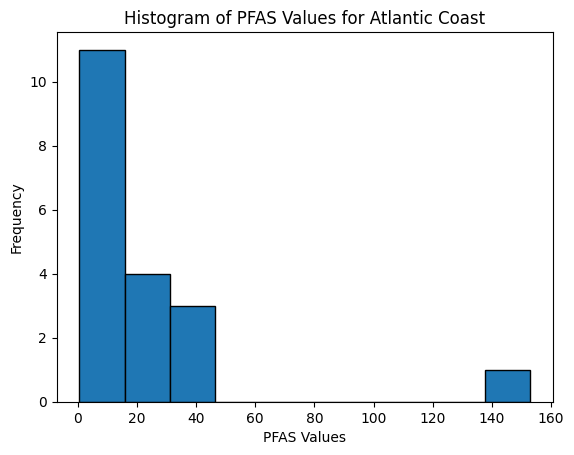

Banana River - Mean: 111.65, Median: 98.0, Mode: [71.0, 94.0, 102.0, 139.0, 91.0, 107.0, 195.0, 214.0, 77.0, 93.0, 92.0, 108.0, 316.0, 253.0, 110.0, 104.0, 22.0, 23.0, 12.0, 10.0]


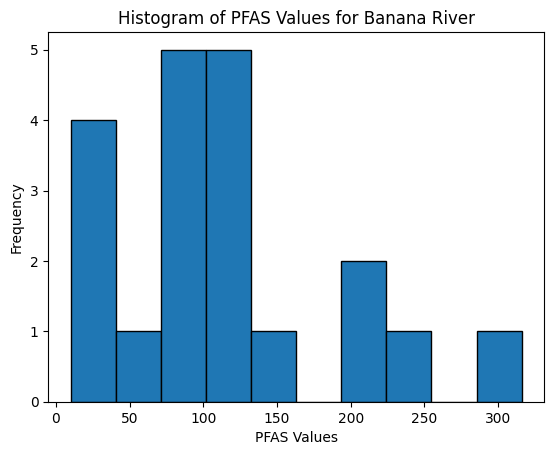

Northern Indian River - Mean: 58.025, Median: 51.0, Mode: [98.0, 49.0, 64.0]


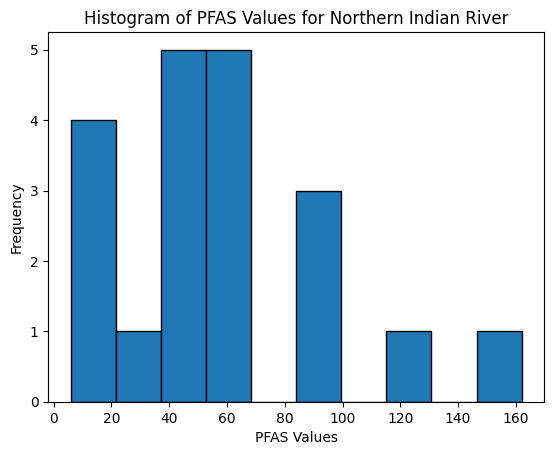

Southern Indian River - Mean: 41.93, Median: 38.5, Mode: [37.0, 33.0]


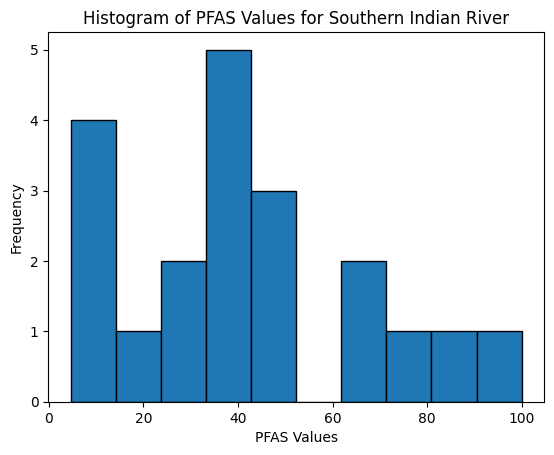

In [43]:
#code to find the mean, median, and mode number of PFAS at each of the 4 locations 

# import necessary libraries
import csv
import matplotlib.pyplot as plt

# initialize dictionaries to store PFAS values by sight
data = {
    "Atlantic Coast": [],
    "Banana River": [],
    "Northern Indian River": [],
    "Southern Indian River": []
}

# read the data from the file
with open('ENV3040 Course Project- PFAS Values.txt', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    headers = next(reader)  # skip the header row
    
    # iterate through each row in the file
    for row in reader:
        try:
            sight = row[2]  # reading the sight from the 3rd column
            pfas_value = float(row[1])  # reading the PFAS value from the 2nd column
            
            # append the PFAS value to the corresponding sight list
            if sight in data:
                data[sight].append(pfas_value)
        except (KeyError, ValueError):
            continue

# function to calculate mean using iteration
def calculate_mean(values):
    total = 0
    for value in values:
        total += value
    mean = total / len(values)
    return mean

# function to calculate median
def calculate_median(values):
    sorted_values = sorted(values)
    n = len(sorted_values)
    midpoint = n // 2
    if n % 2 == 0:
        return (sorted_values[midpoint - 1] + sorted_values[midpoint]) / 2
    else:
        return sorted_values[midpoint]

# function to calculate mode using a different approach
def calculate_mode(values):
    frequency = {}
    for value in values:
        if value in frequency:
            frequency[value] += 1
        else:
            frequency[value] = 1
    most_frequent = max(frequency.values())
    mode = [key for key, value in frequency.items() if value == most_frequent]
    if len(mode) == 1:
        return mode[0]
    else:
        return mode if len(mode) > 0 else "No unique mode"

#create histograms
for sight, values in data.items():
    if values:  # checks if the list is not empty
        mean = calculate_mean(values)
        median = calculate_median(values)
        mode = calculate_mode(values)
        print(f"{sight} - Mean: {mean}, Median: {median}, Mode: {mode}")

        # create histogram
        plt.hist(values, bins=10, edgecolor='black')
        plt.title(f'Histogram of PFAS Values for {sight}')
        plt.xlabel('PFAS Values')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"No data for {sight}")


Pearson Correlation Coefficient: 0.001495783615595987
Spearman Correlation Coefficient: -0.02164070107108082
Linear Regression Equation: y = 0.07904145077719159x + 58.73056994818652


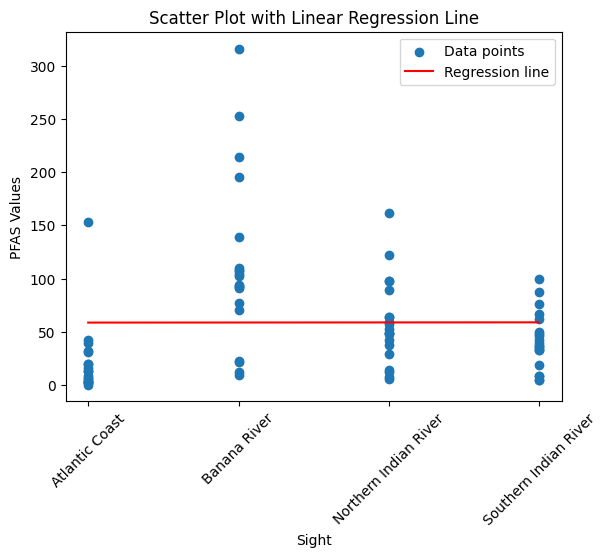

In [44]:
# import necessary libraries
import csv
import numpy as np
import matplotlib.pyplot as plt

# initialize dictionaries to store PFAS values by sight
data = {
    "Atlantic Coast": [],
    "Banana River": [],
    "Northern Indian River": [],
    "Southern Indian River": []
}

# read the data from the file
with open('ENV3040 Course Project- PFAS Values.txt', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    headers = next(reader)  # skip the header row
    
    # iterate through each row in the file
    for row in reader:
        try:
            sight = row[2]  # reading the sight from the 3rd column
            pfas_value = float(row[1])  # reading the PFAS value from the 2nd column
            
            # append the PFAS value to the corresponding sight list
            if sight in data:
                data[sight].append(pfas_value)
        except (KeyError, ValueError):
            continue

# encode sight categories as integers for correlation and regression
sights = ["Atlantic Coast", "Banana River", "Northern Indian River", "Southern Indian River"]
sight_codes = {sight: i for i, sight in enumerate(sights)}

# flatten data into lists for easier processing
pfas_values = []
sight_values = []
for sight, values in data.items():
    for value in values:
        pfas_values.append(value)
        sight_values.append(sight_codes[sight])

# calculate Pearson correlation coefficient
pearson_corr = np.corrcoef(sight_values, pfas_values)[0, 1]
print(f"Pearson Correlation Coefficient: {pearson_corr}")

# calculate Spearman correlation coefficient
spearman_corr = np.corrcoef(np.argsort(sight_values), np.argsort(pfas_values))[0, 1]
print(f"Spearman Correlation Coefficient: {spearman_corr}")

# conduct linear regression
x = np.array(sight_values)
y = np.array(pfas_values)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(f"Linear Regression Equation: y = {m}x + {c}")

# generate scatter plots with linear regression lines
plt.scatter(sight_values, pfas_values, label='Data points')
plt.plot(x, m*x + c, color='red', label='Regression line')
plt.xticks(ticks=list(sight_codes.values()), labels=sight_codes.keys(), rotation=45)
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('Sight')
plt.ylabel('PFAS Values')
plt.legend()
plt.show()


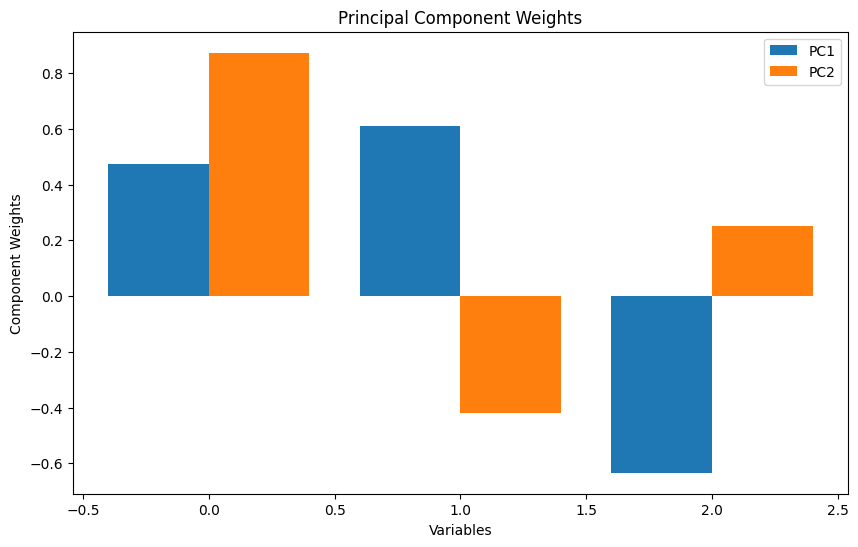

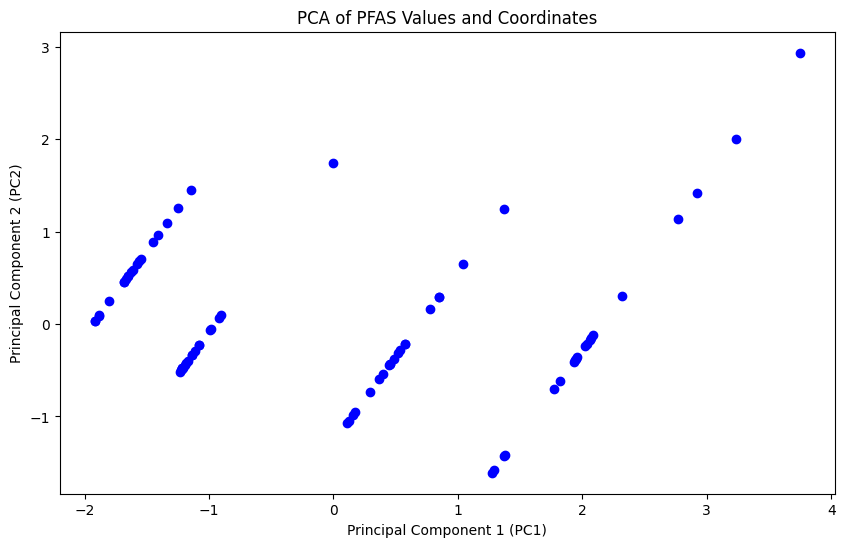

In [72]:
# import necessary libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = []

# read coordinates from the file
coordinates = {}
with open('ENV3040 Course Project- Locations.txt', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    headers = next(reader)  # skip header

    for row in reader:
        try:
            sight = row[4].strip()
            latitude = float(row[1])  # read latitude from the 2nd column
            longitude = float(row[2])  # read longitude from the 3rd column
            coordinates[sight] = [latitude, longitude]
        except (KeyError, ValueError):
            continue

# get data from the PFAS file
with open('ENV3040 Course Project- PFAS Values.txt', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    headers = next(reader)  # skip header

    for row in reader:
        try:
            sight = row[2].strip()
            pfas_value = float(row[1])  # get PFAS value from the 2nd column
            if sight in coordinates:
                data.append([pfas_value] + coordinates[sight])
        except ValueError:
            continue

# make sure data is correctly formatted and not empty
if len(data) == 0:
    print("No data found.")
else:
    data = np.array(data)

    # standardize the data
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    data = (data - mean) / std

    # perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    explained_variance = pca.explained_variance_ratio_

    # get component weights
    component_weights = pca.components_

    # plot component weights with  bar chart
    plt.figure(figsize=(10, 6))
    x = np.arange(len(component_weights[0]))  
    plt.bar(x - 0.2, component_weights[0], width=0.4, label='PC1')
    plt.bar(x + 0.2, component_weights[1], width=0.4, label='PC2')
    plt.xlabel('Variables')
    plt.ylabel('Component Weights')
    plt.title('Principal Component Weights')
    plt.legend()
    plt.show()

    #plot PC1 and PC2
    plt.figure(figsize=(10, 6))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c='b', marker='o')
    plt.title('PCA of PFAS Values and Coordinates')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.show()
